# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [207]:
## install things you need
# !pip install citipy
# !pip install DateTime

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
# import csv
from scipy.stats import linregress
from DateTime import DateTime
# Import API key
from api_keys import weather_api_key
from api_keys import g_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [208]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [209]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
temperatures = []
date = []
latitude = []
longitude = []
speed = []
humidity = []
clouds = []
country = []
api_cities = []
record = 0
setnum = 0
print("Beginning Data Retrieval ")
print("-----------------------------")
for city in cities:
    weather_json = requests.get(query_url + city).json()
    try:
        latitude.append(weather_json["coord"]["lat"])
        longitude.append(weather_json["coord"]["lon"])
        temperatures.append(weather_json["main"]["temp_max"])
        humidity.append(weather_json["main"]["humidity"])
        clouds.append(weather_json["clouds"]["all"])
        speed.append(weather_json["wind"]["speed"])
        date.append(weather_json["dt"])
        country.append(weather_json["sys"]["country"])
        api_cities.append(weather_json["name"])
        if record % 50 == 0:
            setnum = setnum + 1
            record = record + 1
            time.sleep(1)
        else: 
            record = record + 1
        print(f"Processing Record {record} of Set {setnum} | {city}")
    except KeyError:
        print("City not found. Skipping...")
        


Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | poum
Processing Record 2 of Set 1 | touros
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | laguna
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | mataura
City not found. Skipping...
Processing Record 7 of Set 1 | brae
Processing Record 8 of Set 1 | surgut
Processing Record 9 of Set 1 | namibe
Processing Record 10 of Set 1 | kortkeros
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | atar
Processing Record 14 of Set 1 | grindavik
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | loandjili
Processing Record 18 of Set 1 | bethel
City not found. Skipping...
Processing Record 19 of Set 1 | tura
Processing Record 20 of Set 1 | mamakan
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 1 | mount isa
Processing Record

Processing Record 183 of Set 4 | kailua
Processing Record 184 of Set 4 | alta floresta
Processing Record 185 of Set 4 | aracati
Processing Record 186 of Set 4 | dali
Processing Record 187 of Set 4 | hilo
Processing Record 188 of Set 4 | broome
Processing Record 189 of Set 4 | deputatskiy
Processing Record 190 of Set 4 | pilar
Processing Record 191 of Set 4 | port lincoln
City not found. Skipping...
City not found. Skipping...
Processing Record 192 of Set 4 | kodiak
Processing Record 193 of Set 4 | luanda
Processing Record 194 of Set 4 | mercedes
Processing Record 195 of Set 4 | moscow
Processing Record 196 of Set 4 | kahului
Processing Record 197 of Set 4 | marienburg
Processing Record 198 of Set 4 | padang
Processing Record 199 of Set 4 | victoria
Processing Record 200 of Set 4 | half moon bay
Processing Record 201 of Set 5 | satipo
Processing Record 202 of Set 5 | ucluelet
Processing Record 203 of Set 5 | takoradi
Processing Record 204 of Set 5 | vila franca do campo
Processing Recor

Processing Record 365 of Set 8 | lander
Processing Record 366 of Set 8 | the valley
Processing Record 367 of Set 8 | vestmannaeyjar
Processing Record 368 of Set 8 | maldonado
City not found. Skipping...
Processing Record 369 of Set 8 | muriti
Processing Record 370 of Set 8 | sao filipe
Processing Record 371 of Set 8 | belem de sao francisco
Processing Record 372 of Set 8 | xuanzhou
Processing Record 373 of Set 8 | puerto leguizamo
Processing Record 374 of Set 8 | osoyoos
Processing Record 375 of Set 8 | kumluca
Processing Record 376 of Set 8 | yandyki
Processing Record 377 of Set 8 | boa vista
Processing Record 378 of Set 8 | vao
Processing Record 379 of Set 8 | richards bay
Processing Record 380 of Set 8 | murchison
Processing Record 381 of Set 8 | katikati
Processing Record 382 of Set 8 | faanui
Processing Record 383 of Set 8 | fortuna
Processing Record 384 of Set 8 | ewa beach
Processing Record 385 of Set 8 | yulara
Processing Record 386 of Set 8 | nome
Processing Record 387 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [211]:
# make sure the columns are the same length
# print(len(api_cities), len(latitude), len(longitude), len(temperatures), len(humidity), len(clouds), len(speed), len(country), len(date))

#create dataframe
weather_data = pd.DataFrame({
    "City": api_cities,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature (F)": temperatures,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": speed,
    "Country": country,
    "Date": date})
weather_data

,City,Latitude,Longitude,Max Temperature (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Poum,-20.2333,164.0167,78.75,82,86,14.79,NC,1636773886
1,Touros,-5.1989,-35.4608,79.70,80,98,12.84,BR,1636773888
2,Ushuaia,-54.8000,-68.3000,44.26,87,20,8.05,AR,1636773888
3,Laguna,38.4210,-121.4238,64.24,96,90,3.00,US,1636773889
4,Saint-Philippe,-21.3585,55.7679,79.48,76,50,9.44,RE,1636773889
...,...,...,...,...,...,...,...,...,...
538,Daru,-9.0763,143.2092,87.60,62,76,8.61,PG,1636774135
539,Severnyy,50.6770,36.5532,33.84,93,100,8.95,RU,1636774135
540,Alghero,40.5589,8.3181,50.09,100,0,8.05,IT,1636774136
541,Umm Kaddadah,13.6017,26.6876,74.50,18,0,13.56,SD,1636774136


In [212]:
# create cities.csv from dataframe
weather_data.to_csv('cities.csv', header=True, encoding="utf-8", index=False)

#use the new csv to create a new df
api_cities_file = 'cities.csv'
weather_df = pd.read_csv(api_cities_file, encoding="utf-8")
weather_df


,City,Latitude,Longitude,Max Temperature (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Poum,-20.2333,164.0167,78.75,82,86,14.79,NC,1636773886
1,Touros,-5.1989,-35.4608,79.70,80,98,12.84,BR,1636773888
2,Ushuaia,-54.8000,-68.3000,44.26,87,20,8.05,AR,1636773888
3,Laguna,38.4210,-121.4238,64.24,96,90,3.00,US,1636773889
4,Saint-Philippe,-21.3585,55.7679,79.48,76,50,9.44,RE,1636773889
...,...,...,...,...,...,...,...,...,...
538,Daru,-9.0763,143.2092,87.60,62,76,8.61,PG,1636774135
539,Severnyy,50.6770,36.5532,33.84,93,100,8.95,RU,1636774135
540,Alghero,40.5589,8.3181,50.09,100,0,8.05,IT,1636774136
541,Umm Kaddadah,13.6017,26.6876,74.50,18,0,13.56,SD,1636774136


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [213]:
#use describe to generate summary statistics
#note how humidity does not exceed 100%
weather_df.describe()

,Latitude,Longitude,Max Temperature (F),Humidity,Cloudiness,Wind Speed,Date
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,5.430000e+02
mean,20.067714,20.342637,55.663517,73.815838,62.469613,7.221363,1.636774e+09
std,33.669620,91.647431,23.385206,20.327920,38.787320,5.208832,9.706723e+01
min,-54.800000,-175.200000,-24.270000,8.000000,0.000000,0.000000,1.636773e+09
25%,-8.261100,-60.409550,39.090000,64.000000,20.000000,3.360000,1.636774e+09
50%,25.700000,21.677000,61.160000,78.000000,78.000000,5.860000,1.636774e+09
75%,48.618550,101.360200,75.090000,89.000000,99.000000,10.290000,1.636774e+09
max,78.218600,178.416700,95.050000,100.000000,100.000000,31.000000,1.636774e+09


In [214]:
#make sure humidity is the right type
weather_df['Humidity'].dtypes

dtype('int64')

In [215]:
#make a new df before you drop variables
clean_city_data = weather_df
cityindex = clean_city_data[clean_city_data['Humidity'] > 100].index

#  Get the indices of cities that have humidity over 100%.
print(cityindex)

Int64Index([], dtype='int64')


In [216]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data.drop(cityindex, inplace=True)
clean_city_data

,City,Latitude,Longitude,Max Temperature (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Poum,-20.2333,164.0167,78.75,82,86,14.79,NC,1636773886
1,Touros,-5.1989,-35.4608,79.70,80,98,12.84,BR,1636773888
2,Ushuaia,-54.8000,-68.3000,44.26,87,20,8.05,AR,1636773888
3,Laguna,38.4210,-121.4238,64.24,96,90,3.00,US,1636773889
4,Saint-Philippe,-21.3585,55.7679,79.48,76,50,9.44,RE,1636773889
...,...,...,...,...,...,...,...,...,...
538,Daru,-9.0763,143.2092,87.60,62,76,8.61,PG,1636774135
539,Severnyy,50.6770,36.5532,33.84,93,100,8.95,RU,1636774135
540,Alghero,40.5589,8.3181,50.09,100,0,8.05,IT,1636774136
541,Umm Kaddadah,13.6017,26.6876,74.50,18,0,13.56,SD,1636774136


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

#### note how latitude (longitude also) can be positve or negative depending on the hemisphere because we are using max temperature, the temperatures are going to be mostly positive.

[]

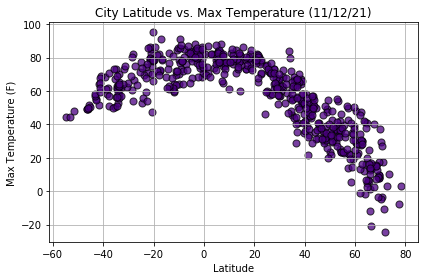

In [217]:

x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Max Temperature (F)"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="indigo", edgecolors="black", s=50, alpha=0.75)
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Max Temperature (11/12/21)')
plt.grid()
plt.tight_layout()
plt.plot()

## Latitude vs. Humidity Plot

#### The humidity is very spread out, although understandably its more grouped between the latitudes of -20 to 60.

[]

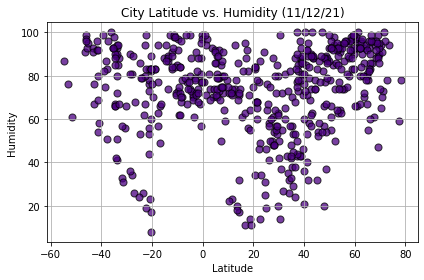

In [218]:
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Humidity"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="indigo", edgecolors="black", s=50, alpha=0.75)
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Humidity (11/12/21)')
plt.grid()
plt.tight_layout()
plt.plot()

## Latitude vs. Cloudiness Plot

#### The cloudiness data is very spread out, although interestingly cloudiness is mostly grouped around 0 and 100, likely due to the prevalence of extreme environments.

[]

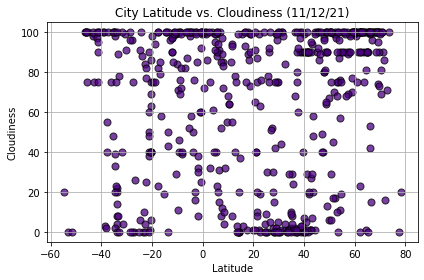

In [219]:
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="indigo", edgecolors="black", s=50, alpha=0.75)
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Cloudiness (11/12/21)')
plt.grid()
plt.tight_layout()
plt.plot()

## Latitude vs. Wind Speed Plot

[]

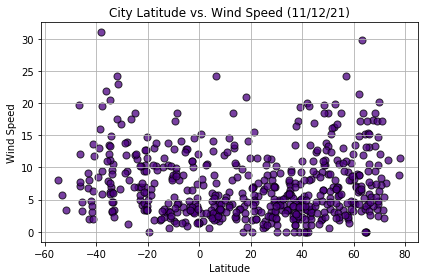

In [220]:
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="indigo", edgecolors="black", s=50, alpha=0.75)
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Wind Speed (11/12/21)')
plt.grid()
plt.tight_layout()
plt.plot()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8115397489147286
The p-value is: 8.734801400380839e-136


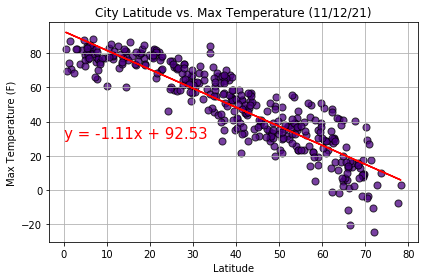

In [248]:
north_df = clean_city_data.loc[clean_city_data["Latitude"]>0]
x_axis = north_df["Latitude"]
y_axis = north_df["Max Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker="o", facecolors="indigo", edgecolors="black", s=50, alpha=0.75)
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Max Temperature (11/12/21)')
plt.grid()
plt.tight_layout()
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4719671978992584
The p-value is: 2.357853187224426e-25


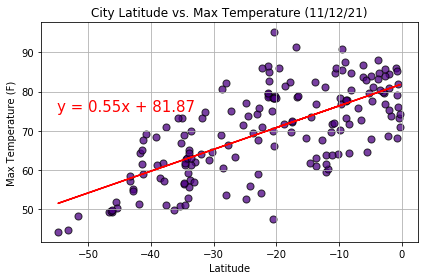

In [249]:
south_df = clean_city_data.loc[clean_city_data["Latitude"]<0]
x_axis = south_df["Latitude"]
y_axis = south_df["Max Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker="o", facecolors="indigo", edgecolors="black", s=50, alpha=0.75)
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Max Temperature (11/12/21)')
plt.grid()
plt.tight_layout()
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,75),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

#### The r-squared is higher for the Northen Hemisphere compared to the Southern Hemisphere, this is likely because we are using Max Temperature rather than just Temperature or Average Temperature. That said, the p-values are expremely high, too much so to infer any conclusion of significance.

The r-squared is: 0.1022102909279575
The p-value is: 2.913167763417627e-10


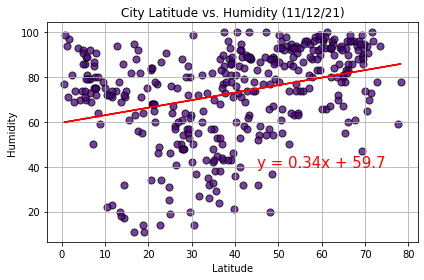

In [256]:
north_df = clean_city_data.loc[clean_city_data["Latitude"]>0]
x_axis = north_df["Latitude"]
y_axis = north_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker="o", facecolors="indigo", edgecolors="black", s=50, alpha=0.75)
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Humidity (11/12/21)')
plt.grid()
plt.tight_layout()
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(45,40),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 7.130085169100553e-05
The p-value is: 0.9124599371597162


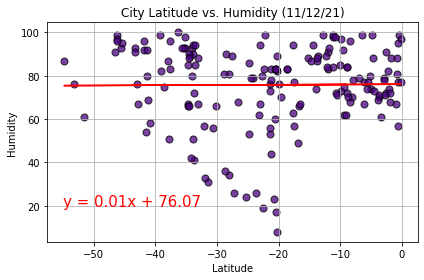

In [259]:
south_df = clean_city_data.loc[clean_city_data["Latitude"]<0]
x_axis = south_df["Latitude"]
y_axis = south_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker="o", facecolors="indigo", edgecolors="black", s=50, alpha=0.75)
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Humidity (11/12/21)')
plt.grid()
plt.tight_layout()
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

#### In both the Northern and Southern Hemisphere, there is too much spread of data to indicate any strong correlation, that is further supported by the extremely snall r-squared values for  both. Similarly, the p-values for both are too high to be of significance.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05926219928006342
The p-value is: 2.0881945908260043e-06


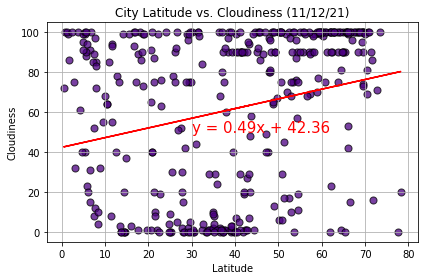

In [260]:
north_df = clean_city_data.loc[clean_city_data["Latitude"]>0]
x_axis = north_df["Latitude"]
y_axis = north_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker="o", facecolors="indigo", edgecolors="black", s=50, alpha=0.75)
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Cloudiness (11/12/21)')
plt.grid()
plt.tight_layout()
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(30,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.013638618242230626
The p-value is: 0.1270917299965757


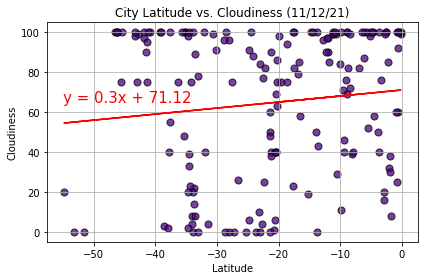

In [262]:
south_df = clean_city_data.loc[clean_city_data["Latitude"]<0]
x_axis = south_df["Latitude"]
y_axis = south_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker="o", facecolors="indigo", edgecolors="black", s=50, alpha=0.75)
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - City Latitude vs. Cloudiness (11/12/21)')
plt.grid()
plt.tight_layout()
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,65),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

#### Similar to the humidy charts, the cloudy charts have a lot of spread with low r-squares and high p-values. This makes sense because clouds travel and are formed all over the world,so it has less to do with latitude probably so much as humidity and other weather conditions.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.048256249449054656
The p-value is: 1.961899973939513e-05


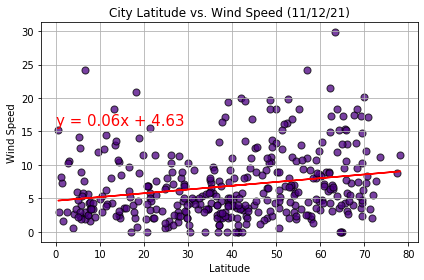

In [265]:
north_df = clean_city_data.loc[clean_city_data["Latitude"]>0]
x_axis = north_df["Latitude"]
y_axis = north_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker="o", facecolors="indigo", edgecolors="black", s=50, alpha=0.75)
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Wind Speed (11/12/21)')
plt.grid()
plt.tight_layout()
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,16),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06400244400566067
The p-value is: 0.0008129767219608417


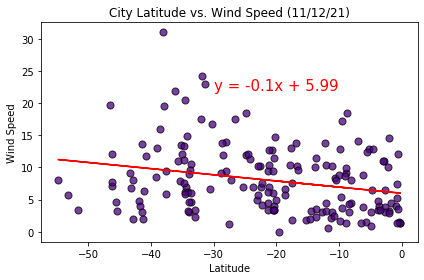

In [266]:
south_df = clean_city_data.loc[clean_city_data["Latitude"]<0]
x_axis = south_df["Latitude"]
y_axis = south_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker="o", facecolors="indigo", edgecolors="black", s=50, alpha=0.75)
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - City Latitude vs. Wind Speed (11/12/21)')
plt.grid()
plt.grid()
plt.tight_layout()
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-30,22),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

#### Interestingly wind peed and latitude seem to have a stronger relationship with the r-saures being larger that those for cloudiness and humidity. The p-value for the southern Hemisphere  is surprisingly statistically significant in this very small sample. I however, would not make any predictive claims about it though becuase of the small sample size and lack of other  factor that could be used to control for noise in the data.